In [6]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
from db import engine

In [7]:
df = pd.read_sql("""
SELECT
    ausschreibung.meldungsnummer,
    anbieter.institution as anbieter_institution,
    auftraggeber.beschaffungsstelle_plz,
    ausschreibung.gatt_wto,
    ausschreibung.sprache,
    ausschreibung.auftragsart,
    ausschreibung.auftragsart_art,
    ausschreibung.lose,
    ausschreibung.teilangebote,
    ausschreibung.varianten,
    ausschreibung.bietergemeinschaft
FROM beruecksichtigteanbieter_zuschlag
JOIN zuschlag ON zuschlag.meldungsnummer = beruecksichtigteanbieter_zuschlag.meldungsnummer
JOIN anbieter ON beruecksichtigteanbieter_zuschlag.anbieter_id = anbieter.anbieter_id
JOIN projekt ON zuschlag.projekt_id = projekt.projekt_id
JOIN auftraggeber ON projekt.auftraggeber_id = auftraggeber.auftraggeber_id
JOIN ausschreibung ON projekt.projekt_id = ausschreibung.projekt_id
;
""", engine)
df

,meldungsnummer,anbieter_institution,beschaffungsstelle_plz,gatt_wto,sprache,auftragsart,auftragsart_art,lose,teilangebote,varianten,bietergemeinschaft
0,376515,None,4001,NO,DE,Bauauftrag,EXECUTION,nein,NO,YES,
1,379059,None,1006,YES,FR,Dienstleistungsauftrag,CPC12,nein,NO,NO,
2,378697,None,3600,YES,FR,Dienstleistungsauftrag,CPC27,nein,NO,NO,Admises sous forme de société simple (conventi...
3,378697,None,3600,YES,FR,Dienstleistungsauftrag,CPC27,nein,NO,NO,Admises sous forme de société simple (conventi...
4,379281,None,3600,YES,FR,Dienstleistungsauftrag,CPC27,nein,NO,NO,Admises sous forme de société simple (conventi...
5,379281,None,3600,YES,FR,Dienstleistungsauftrag,CPC27,nein,NO,NO,Admises sous forme de société simple (conventi...
6,379019,None,4601,NO,DE,Bauauftrag,EXECUTION,nein,NO,NO,zugelassen
7,379425,None,4601,NO,FR,Bauauftrag,EXECUTION,nein,NO,NO,Admises
8,380579,None,3600,YES,DE,Bauauftrag,EXECUTION,nein,NO,NO,Zugelassen als einfache Gesellschaft unter der...
9,380579,None,3600,YES,DE,Bauauftrag,EXECUTION,nein,NO,NO,Zugelassen als einfache Gesellschaft unter der...


In [8]:
auftraggeber_df = pd.read_sql("""
select * from auftraggeber;
""", engine)

ausschreibung_df = pd.read_sql("""
select * from ausschreibung;
""", engine)

# DB- Number of unqiue meldungsnummer entries for institution

In [10]:
db_df = pd.read_sql("""
SELECT alles.institution, count(*) as count FROM (
    SELECT anbieter.institution, ausschreibung.meldungsnummer
    FROM beruecksichtigteanbieter_zuschlag
    JOIN zuschlag ON zuschlag.meldungsnummer = beruecksichtigteanbieter_zuschlag.meldungsnummer
    JOIN anbieter ON beruecksichtigteanbieter_zuschlag.anbieter_id = anbieter.anbieter_id
    JOIN projekt ON zuschlag.projekt_id = projekt.projekt_id
    JOIN auftraggeber ON projekt.auftraggeber_id = auftraggeber.auftraggeber_id
    JOIN ausschreibung ON projekt.projekt_id = ausschreibung.projekt_id
    WHERE anbieter.institution IS NOT NULL
    GROUP BY ausschreibung.meldungsnummer, anbieter.institution
) alles
GROUP BY alles.institution
ORDER BY COUNT(*) DESC;
""", engine)
db_df

,institution,count
0,Marti AG,377
1,Implenia AG,372
2,Alpiq AG,343
3,Siemens AG,312
4,Walo Bertschinger Central AG,271
5,Swisscom,234
6,KIBAG,171
7,Anliker AG,166
8,ERNE AG,154
9,CSD Ingenieure AG,139


In [13]:
# find anbieter
db_df[db_df['institution'].str.contains('ELCA')]

,institution,count
31,ELCA Informatik AG,98


In [50]:
db_df[db_df['count']>80]

,institution,count
0,Marti AG,377
1,Implenia AG,372
2,Alpiq AG,343
3,Siemens AG,312
4,Walo Bertschinger Central AG,271
5,Swisscom,234
6,KIBAG,171
7,Anliker AG,166
8,ERNE AG,154
9,ETAVIS AG,139


# PLZ Stats

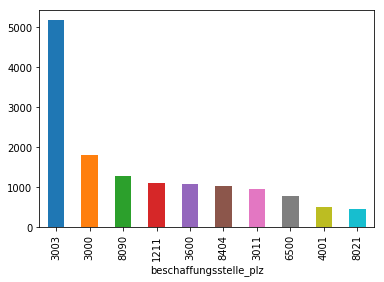

In [51]:
auftraggeber_df.groupby(['beschaffungsstelle_plz']).size().sort_values(ascending=False).head(10).plot.bar()

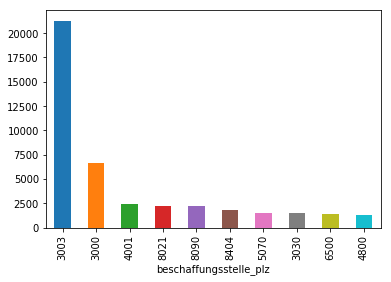

In [65]:
df.groupby(['beschaffungsstelle_plz']).size().sort_values(ascending=False).head(10).plot.bar()

# Auftragsart_Art

In [53]:
ausschreibung_df.groupby(['auftragsart_art']).size().describe()

count       37.000000
mean      1861.135135
std       6452.706758
min          2.000000
25%         54.000000
50%        139.000000
75%        473.000000
max      38478.000000
dtype: float64

In [54]:
df.groupby(['auftragsart_art']).size().describe()

count       36.000000
mean      2060.527778
std       4506.175594
min          1.000000
25%         85.750000
50%        250.000000
75%       1273.750000
max      20901.000000
dtype: float64

In [55]:
ausschreibung_df.groupby(['auftragsart_art']).size().sort_values(ascending=False).head(10)

auftragsart_art
EXECUTION               38478
PURCHASE                 8661
CPC27                    6323
CPC12                    4094
CPC-1                    2311
WORKS.CONTRACT           2090
CPC7                     1684
DESIGN.AND.EXECUTION     1003
COMBINATION               512
CPC6                      473
dtype: int64

In [56]:
df.groupby(['auftragsart_art']).size().sort_values(ascending=False).head(10)

auftragsart_art
EXECUTION         20901
CPC27             13390
PURCHASE          12666
CPC7               6067
CPC12              4657
CPC-1              3342
WORKS.CONTRACT     2870
CPC6               1626
CPC1               1489
CPC22              1202
dtype: int64

# Lose

In [57]:
ausschreibung_df.groupby(['lose']).size().sort_values(ascending=False).head(10)

lose
nein    60828
2        2503
ja       1778
3        1317
4         770
5         481
6         307
7         218
1         159
8         124
dtype: int64

In [58]:
df.groupby(['lose']).size().sort_values(ascending=False).head(10)

lose
nein    41822
ja       4654
2        4482
3        3705
4        3304
9        2418
5        2251
19       2120
6        1984
7        1507
dtype: int64

# Auftragsart

In [59]:
ausschreibung_df.groupby(['auftragsart']).size()

auftragsart
Bauauftrag                39481
Dienstleistungsauftrag    18025
Lieferauftrag             11356
dtype: int64

In [60]:
df.groupby(['auftragsart']).size()

auftragsart
Bauauftrag                21522
Dienstleistungsauftrag    36430
Lieferauftrag             16227
dtype: int64

# Gatt_WTO

In [16]:
ausschreibung_df.groupby('gatt_wto').size()

gatt_wto
NO     30641
YES    38221
dtype: int64

In [61]:
df.groupby('gatt_wto').size()

gatt_wto
NO     26752
YES    47427
dtype: int64

# Teilangebote

In [17]:
ausschreibung_df.groupby(['teilangebote']).size()

teilangebote
NO               64922
NOT_SPECIFIED     1637
YES               2303
dtype: int64

In [62]:
df.groupby(['teilangebote']).size()

teilangebote
NO               56860
NOT_SPECIFIED     1818
YES              15501
dtype: int64

# Varianten

In [19]:
ausschreibung_df.groupby(['varianten']).size()

varianten
NO               40933
NOT_SPECIFIED     4815
YES              23114
dtype: int64

In [63]:
df.groupby(['varianten']).size()

varianten
NO               52242
NOT_SPECIFIED     2107
YES              19830
dtype: int64

# Bietergemeinschaft

Lassen wir sein weil TEXT

# Sprache

In [20]:
ausschreibung_df.groupby(['sprache']).size()

sprache
DE    44323
EN     1088
FR    21567
IT     1884
dtype: int64

In [64]:
df.groupby(['sprache']).size()

sprache
DE    40985
EN     2066
FR    27484
IT     3644
dtype: int64